<a href="https://colab.research.google.com/github/Jammal7/DataScience_Project/blob/main/Dog_Breed_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End Multi-class Dog Breed Classification

A Project work of mine to build an end-to-end multi-class image classifier using TensorFlow

## 1. Problem
Identifying the breed of a dog given an  image of the dog.

## 2. Data
The data was gotten from Kaggle: https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evaluation is a file with prediction probabilites for each doog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## 4. Features
Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10K+ images in the training set(these images have labels)
* There are around 10K+ images in the test set(these images have no labels, cause we have to predict them).

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print('TF Version: ', tf.__version__)
print('TF Version: ', hub.__version__)
print("GPU", "available (YESSS!!!!!!!)" if tf.config.list_logical_devices("GPU") else "not available :(")

TF Version:  2.8.2
TF Version:  0.12.0
GPU available (YESSS!!!!!!!)


## Importing the Dataset

In [ ]:
labels = pd.read_csv('drive/MyDrive/Data Science Project/Dog_breed/labels.csv')
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


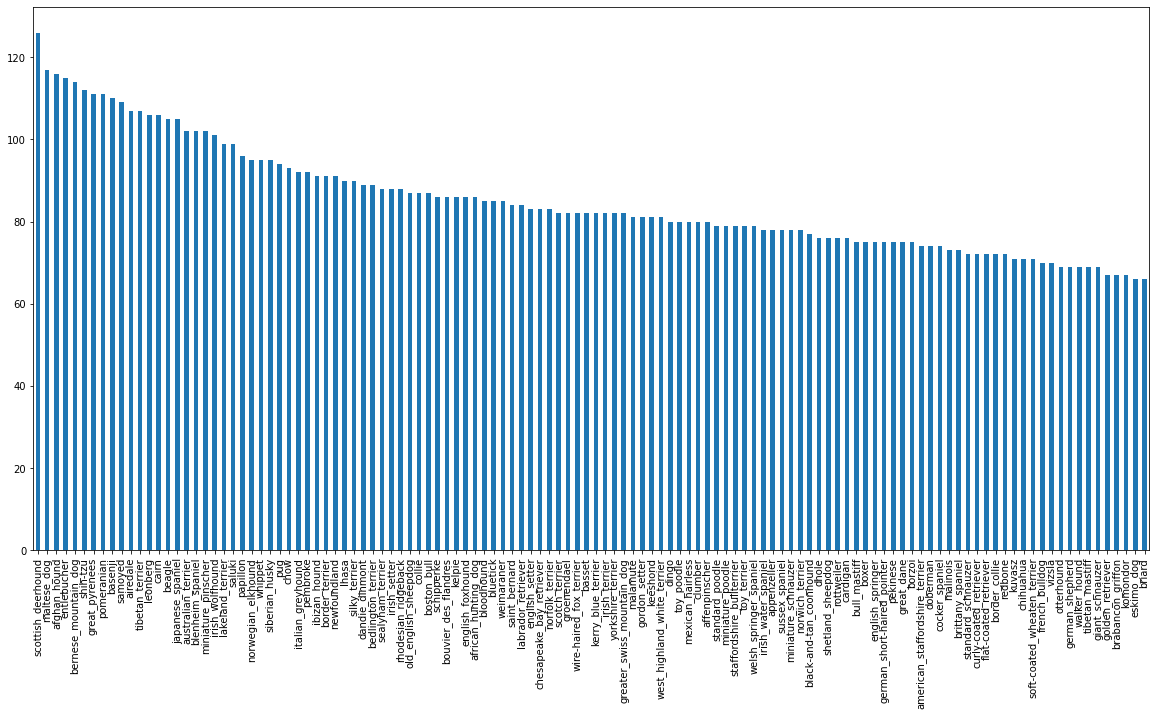

In [ ]:
labels['breed'].value_counts().plot.bar(figsize=(20, 10));

In [ ]:
# The median number of images per class?
labels['breed'].value_counts().median()

82.0

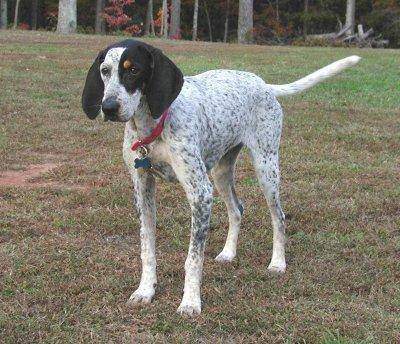

In [ ]:
from IPython.display import Image
Image('drive/MyDrive/Data Science Project/Dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg')

In [ ]:
# Creating pathnames from Image ID's
filenames = ["drive/MyDrive/Data Science Project/Dog_breed/train/" + fname + ".jpg" for fname in labels['id']]

filenames[:10]

['drive/MyDrive/Data Science Project/Dog_breed/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Data Science Project/Dog_breed/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
import os
if len(os.listdir("drive/MyDrive/Data Science Project/Dog_breed/train/")) == len(filenames):
  print('Filenames match actual amount of files!!! Proceed.')
else:
  print('Filenames do not match actual amount of files, check the target directory.')

Filenames match actual amount of files!!! Proceed.


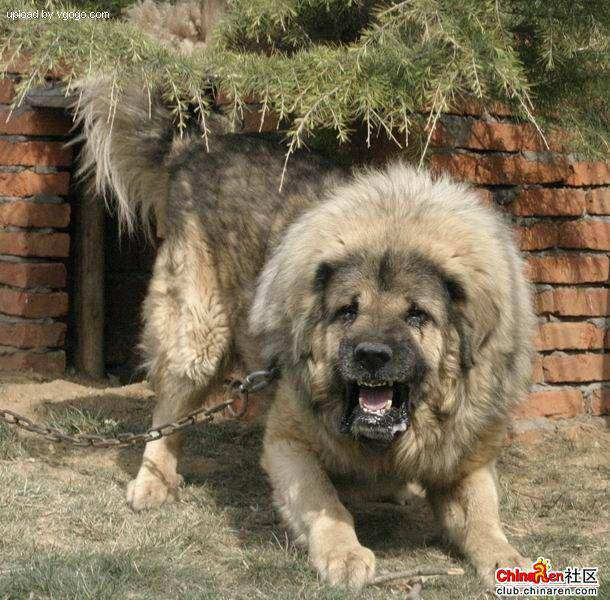

In [ ]:
Image(filenames[9000])

In [ ]:
label = labels['breed'].to_numpy()
label

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(label)

10222

In [ ]:
# Checking if number of labels match the number of filenames
if len(label) == len(filenames):
  print('Good to go!')
else:
  print('Number of labels does not match number of filenames, check data directories!')

Good to go!


In [ ]:
# Find the unique label values
unique_breeds = np.unique(label)
len(unique_breeds)

120

In [ ]:
# Turn every label into a boolean array
boolean_labels = [lab == unique_breeds for lab in label]
boolean_labels[:3] 

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

### Creating validation set

In [ ]:
X = filenames
y = boolean_labels

We're going to start off experimenting with ~1000 images and increase as needed

In [ ]:
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}

In [ ]:
# Splitting the data into train and validation sets
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [21]:
len(X_train)

800